<a href="https://colab.research.google.com/github/anudeep14-max/futurense_internship/blob/main/wildlife.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install ultralytics opencv-python numpy torch torchvision torchaudio


In [7]:
from ultralytics import YOLO

# Load a pre-trained YOLOv8 model
model = YOLO("yolov8n.pt")  # 'n' is the smallest model, replace with 'm', 'l', or 'x' for larger models


In [8]:
!pip install kaggle


In [9]:
from google.colab import files

# Upload kaggle.json
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tiger660","key":"9f556267f3404e3c11e88712db3c2f33"}'}

In [10]:
;
;!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Secure the API key


/bin/bash: -c: line 1: syntax error near unexpected token `"-p ~/.kaggle"'
/bin/bash: -c: line 1: `mkdir("-p ~/.kaggle")'


In [11]:
!kaggle datasets download -d ankanghosh651/object-detection-wildlife-dataset-yolo-format --unzip -p /content/wildlife_dataset


Dataset URL: https://www.kaggle.com/datasets/ankanghosh651/object-detection-wildlife-dataset-yolo-format
License(s): MIT
 95% 428M/449M [00:01<00:00, 284MB/s]
100% 449M/449M [00:01<00:00, 263MB/s]


In [12]:
import os

dataset_path = "/content/wildlife_dataset"
print("Files in dataset:", os.listdir(dataset_path))



Files in dataset: ['images', 'final_data', 'labels', 'data.yaml']


In [13]:
import torch
import os
from ultralytics import YOLO

# Check if GPU is available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")


Using device: cuda


In [14]:
data_yaml = """
path: /content/wildlife_dataset  # Root directory
train: images/train  # Training images folder
val: images/val  # Validation images folder

nc: 4  # Number of classes (e.g., Buffalo, Elephant, Rhino, Zebra)
names: ["Buffalo", "Elephant", "Rhino", "Zebra"]  # Class names
"""

# Save to file
with open("/content/wildlife_dataset/data.yaml", "w") as f:
    f.write(data_yaml)

print("Dataset YAML file created successfully!")


Dataset YAML file created successfully!


In [15]:
import os

dataset_path = "/content/wildlife_dataset"

# List files inside dataset path
print("Dataset files:", os.listdir(dataset_path))


Dataset files: ['images', 'final_data', 'labels', 'data.yaml']


In [16]:
print("Train images:", os.listdir("/content/wildlife_dataset/images/train")[:5])
print("Val images:", os.listdir("/content/wildlife_dataset/images/val")[:5])


Train images: ['0077.jpg', '1005.jpg', '1373.jpg', '0352.jpg', '0651.jpg']
Val images: ['1047.jpg', '0745.jpg', '0614.jpg', '0106.jpg', '0466.jpg']


In [17]:
import os

dataset_path = "/content/wildlife_dataset"

# List contents of the dataset folder
if os.path.exists(dataset_path):
    print("Dataset directory exists! Here are the files:")
    print(os.listdir(dataset_path))
else:
    print("Dataset directory NOT found. Re-downloading is needed.")


Dataset directory exists! Here are the files:
['images', 'final_data', 'labels', 'data.yaml']


In [18]:
!ls -R /content/wildlife_dataset/final_data


/content/wildlife_dataset/final_data:
data_wl.yaml  test  train  valid

/content/wildlife_dataset/final_data/test:
images	labels

/content/wildlife_dataset/final_data/test/images:
0017.jpg  0194.jpg  0383.jpg  0570.jpg	0734.jpg  0885.jpg  1073.jpg  1209.jpg	1341.jpg  1467.jpg
0033.jpg  0214.jpg  0387.jpg  0571.jpg	0758.jpg  0893.jpg  1074.jpg  1217.jpg	1364.jpg  1476.jpg
0034.jpg  0234.jpg  0394.jpg  0575.jpg	0762.jpg  0894.jpg  1076.jpg  1221.jpg	1370.jpg  1481.jpg
0045.jpg  0240.jpg  0395.jpg  0582.jpg	0766.jpg  0911.jpg  1078.jpg  1229.jpg	1374.jpg  1482.jpg
0046.jpg  0251.jpg  0424.jpg  0586.jpg	0772.jpg  0915.jpg  1091.jpg  1238.jpg	1389.jpg  1491.jpg
0061.jpg  0253.jpg  0428.jpg  0596.jpg	0778.jpg  0933.jpg  1114.jpg  1258.jpg	1400.jpg  1492.jpg
0119.jpg  0260.jpg  0437.jpg  0621.jpg	0782.jpg  0952.jpg  1116.jpg  1270.jpg	1401.jpg  1495.jpg
0122.jpg  0269.jpg  0476.jpg  0622.jpg	0796.jpg  0958.jpg  1119.jpg  1271.jpg	1404.jpg
0131.jpg  0278.jpg  0487.jpg  0624.jpg	0804.jpg  0967.

In [19]:
import os
import shutil

dataset_path = "/content/wildlife_dataset"
final_data_path = os.path.join(dataset_path, "final_data")

# Create the expected structure
os.makedirs(os.path.join(dataset_path, "images/train"), exist_ok=True)
os.makedirs(os.path.join(dataset_path, "images/val"), exist_ok=True)
os.makedirs(os.path.join(dataset_path, "labels/train"), exist_ok=True)
os.makedirs(os.path.join(dataset_path, "labels/val"), exist_ok=True)

# Move images and labels (modify if necessary)
for file in os.listdir(final_data_path):
    if file.endswith(".jpg") or file.endswith(".png"):  # Assuming images are in jpg/png format
        shutil.move(os.path.join(final_data_path, file), os.path.join(dataset_path, "images/train", file))
    elif file.endswith(".txt"):  # Assuming labels are in YOLO txt format
        shutil.move(os.path.join(final_data_path, file), os.path.join(dataset_path, "labels/train", file))

print("✅ Dataset structure fixed!")


✅ Dataset structure fixed!


In [20]:
!ls -R /content/wildlife_dataset


/content/wildlife_dataset:
data.yaml  final_data  images  labels

/content/wildlife_dataset/final_data:
data_wl.yaml  test  train  valid

/content/wildlife_dataset/final_data/test:
images	labels

/content/wildlife_dataset/final_data/test/images:
0017.jpg  0194.jpg  0383.jpg  0570.jpg	0734.jpg  0885.jpg  1073.jpg  1209.jpg	1341.jpg  1467.jpg
0033.jpg  0214.jpg  0387.jpg  0571.jpg	0758.jpg  0893.jpg  1074.jpg  1217.jpg	1364.jpg  1476.jpg
0034.jpg  0234.jpg  0394.jpg  0575.jpg	0762.jpg  0894.jpg  1076.jpg  1221.jpg	1370.jpg  1481.jpg
0045.jpg  0240.jpg  0395.jpg  0582.jpg	0766.jpg  0911.jpg  1078.jpg  1229.jpg	1374.jpg  1482.jpg
0046.jpg  0251.jpg  0424.jpg  0586.jpg	0772.jpg  0915.jpg  1091.jpg  1238.jpg	1389.jpg  1491.jpg
0061.jpg  0253.jpg  0428.jpg  0596.jpg	0778.jpg  0933.jpg  1114.jpg  1258.jpg	1400.jpg  1492.jpg
0119.jpg  0260.jpg  0437.jpg  0621.jpg	0782.jpg  0952.jpg  1116.jpg  1270.jpg	1401.jpg  1495.jpg
0122.jpg  0269.jpg  0476.jpg  0622.jpg	0796.jpg  0958.jpg  1119.jpg  1271.j

In [21]:
import os
import shutil

dataset_path = "/content/wildlife_dataset"
final_data_path = os.path.join(dataset_path, "final_data")

# Create correct YOLO structure
os.makedirs(f"{dataset_path}/images/train", exist_ok=True)
os.makedirs(f"{dataset_path}/images/val", exist_ok=True)
os.makedirs(f"{dataset_path}/labels/train", exist_ok=True)
os.makedirs(f"{dataset_path}/labels/val", exist_ok=True)

# Move images and labels if they exist
for file in os.listdir(final_data_path):
    if file.endswith((".jpg", ".png", ".jpeg")):  # Image files
        shutil.move(os.path.join(final_data_path, file), os.path.join(dataset_path, "images/train", file))
    elif file.endswith(".txt"):  # YOLO annotation files
        shutil.move(os.path.join(final_data_path, file), os.path.join(dataset_path, "labels/train", file))

print("✅ Dataset structure fixed. Images moved to correct locations.")


✅ Dataset structure fixed. Images moved to correct locations.


In [22]:
print("Train images:", os.listdir("/content/wildlife_dataset/images/train")[:5])
print("Train labels:", os.listdir("/content/wildlife_dataset/labels/train")[:5])


Train images: ['0077.jpg', '1005.jpg', '1373.jpg', '0352.jpg', '0651.jpg']
Train labels: ['0356.txt', '0945.txt', '0741.txt', '0775.txt', '0195.txt']


In [23]:
!ls -R /content/wildlife_dataset/final_data


/content/wildlife_dataset/final_data:
data_wl.yaml  test  train  valid

/content/wildlife_dataset/final_data/test:
images	labels

/content/wildlife_dataset/final_data/test/images:
0017.jpg  0194.jpg  0383.jpg  0570.jpg	0734.jpg  0885.jpg  1073.jpg  1209.jpg	1341.jpg  1467.jpg
0033.jpg  0214.jpg  0387.jpg  0571.jpg	0758.jpg  0893.jpg  1074.jpg  1217.jpg	1364.jpg  1476.jpg
0034.jpg  0234.jpg  0394.jpg  0575.jpg	0762.jpg  0894.jpg  1076.jpg  1221.jpg	1370.jpg  1481.jpg
0045.jpg  0240.jpg  0395.jpg  0582.jpg	0766.jpg  0911.jpg  1078.jpg  1229.jpg	1374.jpg  1482.jpg
0046.jpg  0251.jpg  0424.jpg  0586.jpg	0772.jpg  0915.jpg  1091.jpg  1238.jpg	1389.jpg  1491.jpg
0061.jpg  0253.jpg  0428.jpg  0596.jpg	0778.jpg  0933.jpg  1114.jpg  1258.jpg	1400.jpg  1492.jpg
0119.jpg  0260.jpg  0437.jpg  0621.jpg	0782.jpg  0952.jpg  1116.jpg  1270.jpg	1401.jpg  1495.jpg
0122.jpg  0269.jpg  0476.jpg  0622.jpg	0796.jpg  0958.jpg  1119.jpg  1271.jpg	1404.jpg
0131.jpg  0278.jpg  0487.jpg  0624.jpg	0804.jpg  0967.

In [24]:
import os
import shutil

# Define paths
base_path = "/content/wildlife_dataset"
final_data_path = os.path.join(base_path, "final_data")

# Create correct structure
os.makedirs(f"{base_path}/images/train", exist_ok=True)
os.makedirs(f"{base_path}/images/val", exist_ok=True)
os.makedirs(f"{base_path}/labels/train", exist_ok=True)
os.makedirs(f"{base_path}/labels/val", exist_ok=True)

# Move train images and labels
train_images_path = os.path.join(final_data_path, "train/images")
train_labels_path = os.path.join(final_data_path, "train/labels")

for file in os.listdir(train_images_path):
    shutil.move(os.path.join(train_images_path, file), f"{base_path}/images/train/{file}")

for file in os.listdir(train_labels_path):
    shutil.move(os.path.join(train_labels_path, file), f"{base_path}/labels/train/{file}")

# Move validation images and labels
val_images_path = os.path.join(final_data_path, "valid/images")
val_labels_path = os.path.join(final_data_path, "valid/labels")

for file in os.listdir(val_images_path):
    shutil.move(os.path.join(val_images_path, file), f"{base_path}/images/val/{file}")

for file in os.listdir(val_labels_path):
    shutil.move(os.path.join(val_labels_path, file), f"{base_path}/labels/val/{file}")

print("✅ Dataset structure fixed! Images and labels moved to the correct folders.")


✅ Dataset structure fixed! Images and labels moved to the correct folders.


In [25]:
print("Train images:", os.listdir("/content/wildlife_dataset/images/train")[:5])
print("Train labels:", os.listdir("/content/wildlife_dataset/labels/train")[:5])
print("Val images:", os.listdir("/content/wildlife_dataset/images/val")[:5])
print("Val labels:", os.listdir("/content/wildlife_dataset/labels/val")[:5])


Train images: ['0077.jpg', '1005.jpg', '1373.jpg', '0352.jpg', '0651.jpg']
Train labels: ['0356.txt', '0945.txt', '0741.txt', '0775.txt', '0195.txt']
Val images: ['1047.jpg', '0745.jpg', '0614.jpg', '0106.jpg', '0466.jpg']
Val labels: ['0696.txt', '1319.txt', '1502.txt', '1212.txt', '0490.txt']


In [26]:
data_yaml = """
path: /content/wildlife_dataset
train: images/train
val: images/val

nc: 4  # Number of classes (modify if needed)
names: ["Buffalo", "Elephant", "Rhino", "Zebra"]
"""

with open("/content/wildlife_dataset/data.yaml", "w") as f:
    f.write(data_yaml)

print("✅ Updated data.yaml successfully!")


✅ Updated data.yaml successfully!


In [27]:
from ultralytics import YOLO

# Load YOLOv8 model
model = YOLO("yolov8n.pt")

# Train the model
model.train(data="/content/wildlife_dataset/data.yaml", epochs=50, imgsz=640, device="cuda")


Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/wildlife_dataset/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, 

train: Scanning /content/wildlife_dataset/labels/train.cache... 1203 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1203/1203 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/wildlife_dataset/labels/val.cache... 150 images, 0 backgrounds, 0 corrupt: 100%|██████████| 150/150 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.09G     0.8232      2.144      1.207          9        640: 100%|██████████| 76/76 [00:27<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]

                   all        150        262        0.8      0.717      0.841      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.54G     0.8954      1.465      1.247          9        640: 100%|██████████| 76/76 [00:26<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.90it/s]

                   all        150        262       0.83       0.68      0.795      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.54G     0.9602       1.39      1.272         11        640: 100%|██████████| 76/76 [00:25<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.58it/s]

                   all        150        262      0.639      0.715      0.746      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.56G     0.9687      1.281      1.276          9        640: 100%|██████████| 76/76 [00:25<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.85it/s]

                   all        150        262      0.792      0.765      0.832      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.56G     0.9646      1.262       1.29          6        640: 100%|██████████| 76/76 [00:25<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.80it/s]

                   all        150        262      0.732      0.789      0.853      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.56G      0.908      1.139      1.237         21        640: 100%|██████████| 76/76 [00:25<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.05it/s]

                   all        150        262      0.826      0.774      0.885      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.56G     0.9015      1.073      1.244         12        640: 100%|██████████| 76/76 [00:25<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.67it/s]

                   all        150        262      0.859      0.756      0.871       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.56G     0.9114      1.015       1.23         17        640: 100%|██████████| 76/76 [00:25<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.40it/s]

                   all        150        262      0.902      0.814      0.887      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.57G     0.8647     0.9541      1.209         20        640: 100%|██████████| 76/76 [00:25<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.78it/s]

                   all        150        262      0.875       0.84      0.896      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       2.6G     0.8219     0.8834      1.181         16        640: 100%|██████████| 76/76 [00:25<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.94it/s]

                   all        150        262       0.85      0.802       0.91      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       2.6G     0.8478     0.9056        1.2          5        640: 100%|██████████| 76/76 [00:25<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.06it/s]

                   all        150        262        0.9      0.793        0.9      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       2.6G       0.81      0.874      1.175         10        640: 100%|██████████| 76/76 [00:25<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.00it/s]

                   all        150        262      0.874      0.876      0.932       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       2.6G     0.8101     0.8196      1.169         12        640: 100%|██████████| 76/76 [00:25<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.91it/s]

                   all        150        262      0.904      0.845      0.901      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       2.6G     0.7901     0.7968       1.15         17        640: 100%|██████████| 76/76 [00:25<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.59it/s]

                   all        150        262      0.913      0.881      0.947      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50       2.6G     0.7856     0.7777      1.151         11        640: 100%|██████████| 76/76 [00:24<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.11it/s]

                   all        150        262      0.884      0.868      0.928      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50       2.6G     0.7623     0.7482      1.149          9        640: 100%|██████████| 76/76 [00:25<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.07it/s]

                   all        150        262      0.929      0.869      0.943      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       2.6G     0.7763     0.7355      1.143          9        640: 100%|██████████| 76/76 [00:25<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.58it/s]

                   all        150        262      0.925      0.878      0.934      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50       2.6G     0.7465     0.7439      1.135         11        640: 100%|██████████| 76/76 [00:24<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.84it/s]

                   all        150        262      0.933      0.885      0.946      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       2.6G     0.7348     0.7137      1.123          9        640: 100%|██████████| 76/76 [00:25<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.89it/s]

                   all        150        262      0.947      0.874      0.949      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       2.6G     0.7356     0.7115      1.128         12        640: 100%|██████████| 76/76 [00:25<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.15it/s]

                   all        150        262      0.906       0.88      0.939      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50       2.6G     0.7272     0.6792      1.127          9        640: 100%|██████████| 76/76 [00:25<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.89it/s]

                   all        150        262      0.915      0.899      0.936      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50       2.6G     0.7087     0.6506      1.106         12        640: 100%|██████████| 76/76 [00:25<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.07it/s]

                   all        150        262      0.929      0.891      0.946      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       2.6G     0.7162     0.6798      1.103         13        640: 100%|██████████| 76/76 [00:25<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.04it/s]

                   all        150        262      0.958       0.89      0.951      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       2.6G     0.7027     0.6407        1.1         12        640: 100%|██████████| 76/76 [00:25<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]

                   all        150        262      0.927      0.895      0.952      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.61G     0.6852     0.6294      1.091         15        640: 100%|██████████| 76/76 [00:25<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.96it/s]

                   all        150        262      0.933      0.891       0.94      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.61G     0.6816     0.6174      1.091         10        640: 100%|██████████| 76/76 [00:25<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.17it/s]

                   all        150        262      0.954      0.909      0.956      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.61G     0.6682      0.597      1.082         18        640: 100%|██████████| 76/76 [00:25<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.45it/s]

                   all        150        262      0.952      0.893      0.953      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.61G     0.6677     0.5836      1.088         12        640: 100%|██████████| 76/76 [00:25<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.88it/s]

                   all        150        262      0.954      0.928       0.97      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.61G     0.6706     0.5846      1.078          9        640: 100%|██████████| 76/76 [00:25<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.86it/s]

                   all        150        262      0.943      0.915      0.957      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.62G     0.6565     0.5645      1.075         12        640: 100%|██████████| 76/76 [00:25<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.01it/s]

                   all        150        262      0.918      0.939      0.948      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.64G     0.6466      0.556      1.064         13        640: 100%|██████████| 76/76 [00:25<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.80it/s]

                   all        150        262      0.942      0.928      0.965       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.66G     0.6292     0.5492      1.061          9        640: 100%|██████████| 76/76 [00:24<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.10it/s]

                   all        150        262      0.962      0.927      0.963       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.66G     0.6354      0.532      1.058         12        640: 100%|██████████| 76/76 [00:25<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.84it/s]

                   all        150        262      0.964      0.882      0.958      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.66G      0.618     0.5254      1.049          3        640: 100%|██████████| 76/76 [00:25<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.23it/s]

                   all        150        262      0.935      0.931      0.966      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.66G     0.6127      0.531      1.057          6        640: 100%|██████████| 76/76 [00:25<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.16it/s]

                   all        150        262      0.945      0.918      0.968      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.66G      0.606     0.5171      1.048         10        640: 100%|██████████| 76/76 [00:25<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.18it/s]

                   all        150        262      0.976      0.927      0.969      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.66G     0.6152     0.5028      1.041          8        640: 100%|██████████| 76/76 [00:25<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.88it/s]

                   all        150        262      0.938       0.92      0.964       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.67G     0.6109     0.5113      1.049         10        640: 100%|██████████| 76/76 [00:25<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.90it/s]

                   all        150        262      0.949      0.935      0.968      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.67G     0.5769     0.4862      1.032         13        640: 100%|██████████| 76/76 [00:27<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.06it/s]

                   all        150        262      0.964      0.926      0.969      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.67G     0.5889     0.4921      1.038          6        640: 100%|██████████| 76/76 [00:36<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.21it/s]

                   all        150        262      0.968       0.91      0.967      0.829


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.67G     0.5094     0.3972     0.9729          4        640: 100%|██████████| 76/76 [00:37<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.51it/s]

                   all        150        262      0.953      0.935      0.968      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.67G     0.4951     0.3712      0.965          5        640: 100%|██████████| 76/76 [00:29<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.29it/s]

                   all        150        262      0.964      0.931      0.969      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.67G     0.4792     0.3492     0.9488          4        640: 100%|██████████| 76/76 [00:24<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.17it/s]

                   all        150        262      0.944      0.919      0.965      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.67G      0.475     0.3547      0.957          9        640: 100%|██████████| 76/76 [00:25<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.33it/s]

                   all        150        262      0.949      0.928      0.972      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.67G     0.4692     0.3573      0.942          3        640: 100%|██████████| 76/76 [00:25<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.69it/s]

                   all        150        262      0.963      0.915      0.969      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.67G     0.4546     0.3273     0.9323          4        640: 100%|██████████| 76/76 [00:24<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.38it/s]

                   all        150        262      0.941      0.922      0.963       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.67G     0.4489     0.3243      0.929          6        640: 100%|██████████| 76/76 [00:24<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.08it/s]

                   all        150        262      0.939      0.924      0.963      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.67G     0.4304      0.305     0.9198          4        640: 100%|██████████| 76/76 [00:24<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.12it/s]

                   all        150        262      0.964      0.918      0.963      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.67G     0.4323     0.3069     0.9302          3        640: 100%|██████████| 76/76 [00:24<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.96it/s]

                   all        150        262      0.959      0.937      0.968      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.67G     0.4299     0.2964     0.9203          8        640: 100%|██████████| 76/76 [00:24<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.92it/s]

                   all        150        262      0.975      0.914      0.967      0.845



50 epochs completed in 0.398 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 6.2MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.90it/s]


                   all        150        262      0.964      0.931      0.969      0.848
               Buffalo         38         60      0.965        0.9      0.946      0.858
              Elephant         43         83      0.951       0.94       0.97      0.791
                 Rhino         42         58      0.982      0.967      0.994      0.917
                 Zebra         28         61      0.957      0.918      0.965      0.825
Speed: 0.2ms preprocess, 3.1ms inference, 0.0ms loss, 3.7ms postprocess per image
Results saved to runs/detect/train4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cd1421c5550>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [30]:
import os
os.environ["LC_ALL"] = "C.UTF-8"
os.environ["LANG"] = "C.UTF-8"


In [31]:
import os
import locale

# Set locale environment variables
os.environ["LC_ALL"] = "C.UTF-8"
os.environ["LANG"] = "C.UTF-8"

# Verify locale
locale.getpreferredencoding()


'UTF-8'

In [32]:
!ls -R runs/detect/


runs/detect/:
train  train2  train3  train4

runs/detect/train:
args.yaml  weights

runs/detect/train/weights:

runs/detect/train2:
args.yaml  events.out.tfevents.1742198108.05a11daf1d6e.274.0  weights

runs/detect/train2/weights:

runs/detect/train3:
F1_curve.png					   labels_correlogram.jpg  val_batch0_labels.jpg
PR_curve.png					   results.csv		   val_batch0_pred.jpg
P_curve.png					   results.png		   val_batch1_labels.jpg
R_curve.png					   train_batch0.jpg	   val_batch1_pred.jpg
args.yaml					   train_batch1.jpg	   val_batch2_labels.jpg
confusion_matrix.png				   train_batch2.jpg	   val_batch2_pred.jpg
confusion_matrix_normalized.png			   train_batch3040.jpg	   weights
events.out.tfevents.1742198328.05a11daf1d6e.274.1  train_batch3041.jpg
labels.jpg					   train_batch3042.jpg

runs/detect/train3/weights:
best.pt  last.pt

runs/detect/train4:
F1_curve.png					     labels_correlogram.jpg  val_batch0_labels.jpg
PR_curve.png					     results.csv	     val_batch0_pred.jpg
P_curve.png		

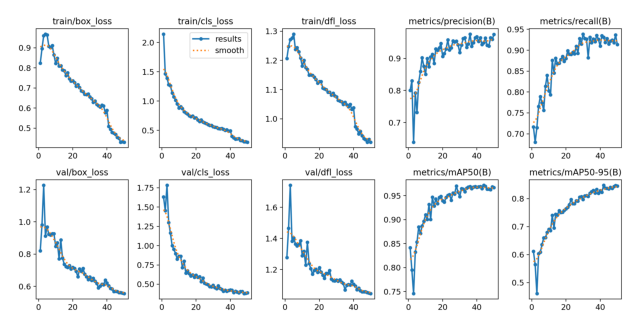

In [33]:
import cv2
import matplotlib.pyplot as plt

# Correct path based on your output
image_path = "runs/detect/train3/results.png"

# Load and display the image
if os.path.exists(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis("off")
    plt.show()
else:
    print("⚠️ results.png is still missing!")


✅ File found: runs/detect/train3/results.png


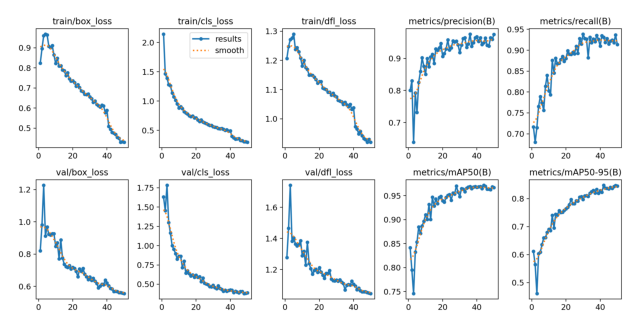

In [36]:
import os
import cv2
import matplotlib.pyplot as plt

# Correct path based on your training results
image_path = "runs/detect/train3/results.png"

# Check if the file exists
if not os.path.exists(image_path):
    print(f"⚠️ File not found: {image_path}")
else:
    print(f"✅ File found: {image_path}")

    # Load and display the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis("off")
    plt.show()


In [37]:
from ultralytics import YOLO

# Load the trained model
model = YOLO("runs/detect/train3/weights/best.pt")  # Update path if needed

# Run validation
metrics = model.val()

# Display the metrics
print(metrics)



Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/wildlife_dataset/labels/val.cache... 150 images, 0 backgrounds, 0 corrupt: 100%|██████████| 150/150 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.75it/s]


                   all        150        262      0.966      0.937      0.969       0.85
               Buffalo         38         60      0.964      0.905      0.946      0.857
              Elephant         43         83       0.95       0.94      0.973      0.793
                 Rhino         42         58      0.983      0.986      0.994      0.922
                 Zebra         28         61      0.965      0.918      0.965      0.828
Speed: 1.7ms preprocess, 7.2ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cd21efcc850>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0

In [38]:
print(f"📌 Precision: {metrics.box.map50:.4f}")  # Precision at IoU=0.5
print(f"📌 Recall: {metrics.box.map:.4f}")  # Recall at IoU=0.5
print(f"📌 mAP@50: {metrics.box.map50:.4f}")  # mAP at IoU=0.5
print(f"📌 mAP@50-95: {metrics.box.map:.4f}")  # mAP at IoU 0.5:0.95


📌 Precision: 0.9694
📌 Recall: 0.8500
📌 mAP@50: 0.9694
📌 mAP@50-95: 0.8500


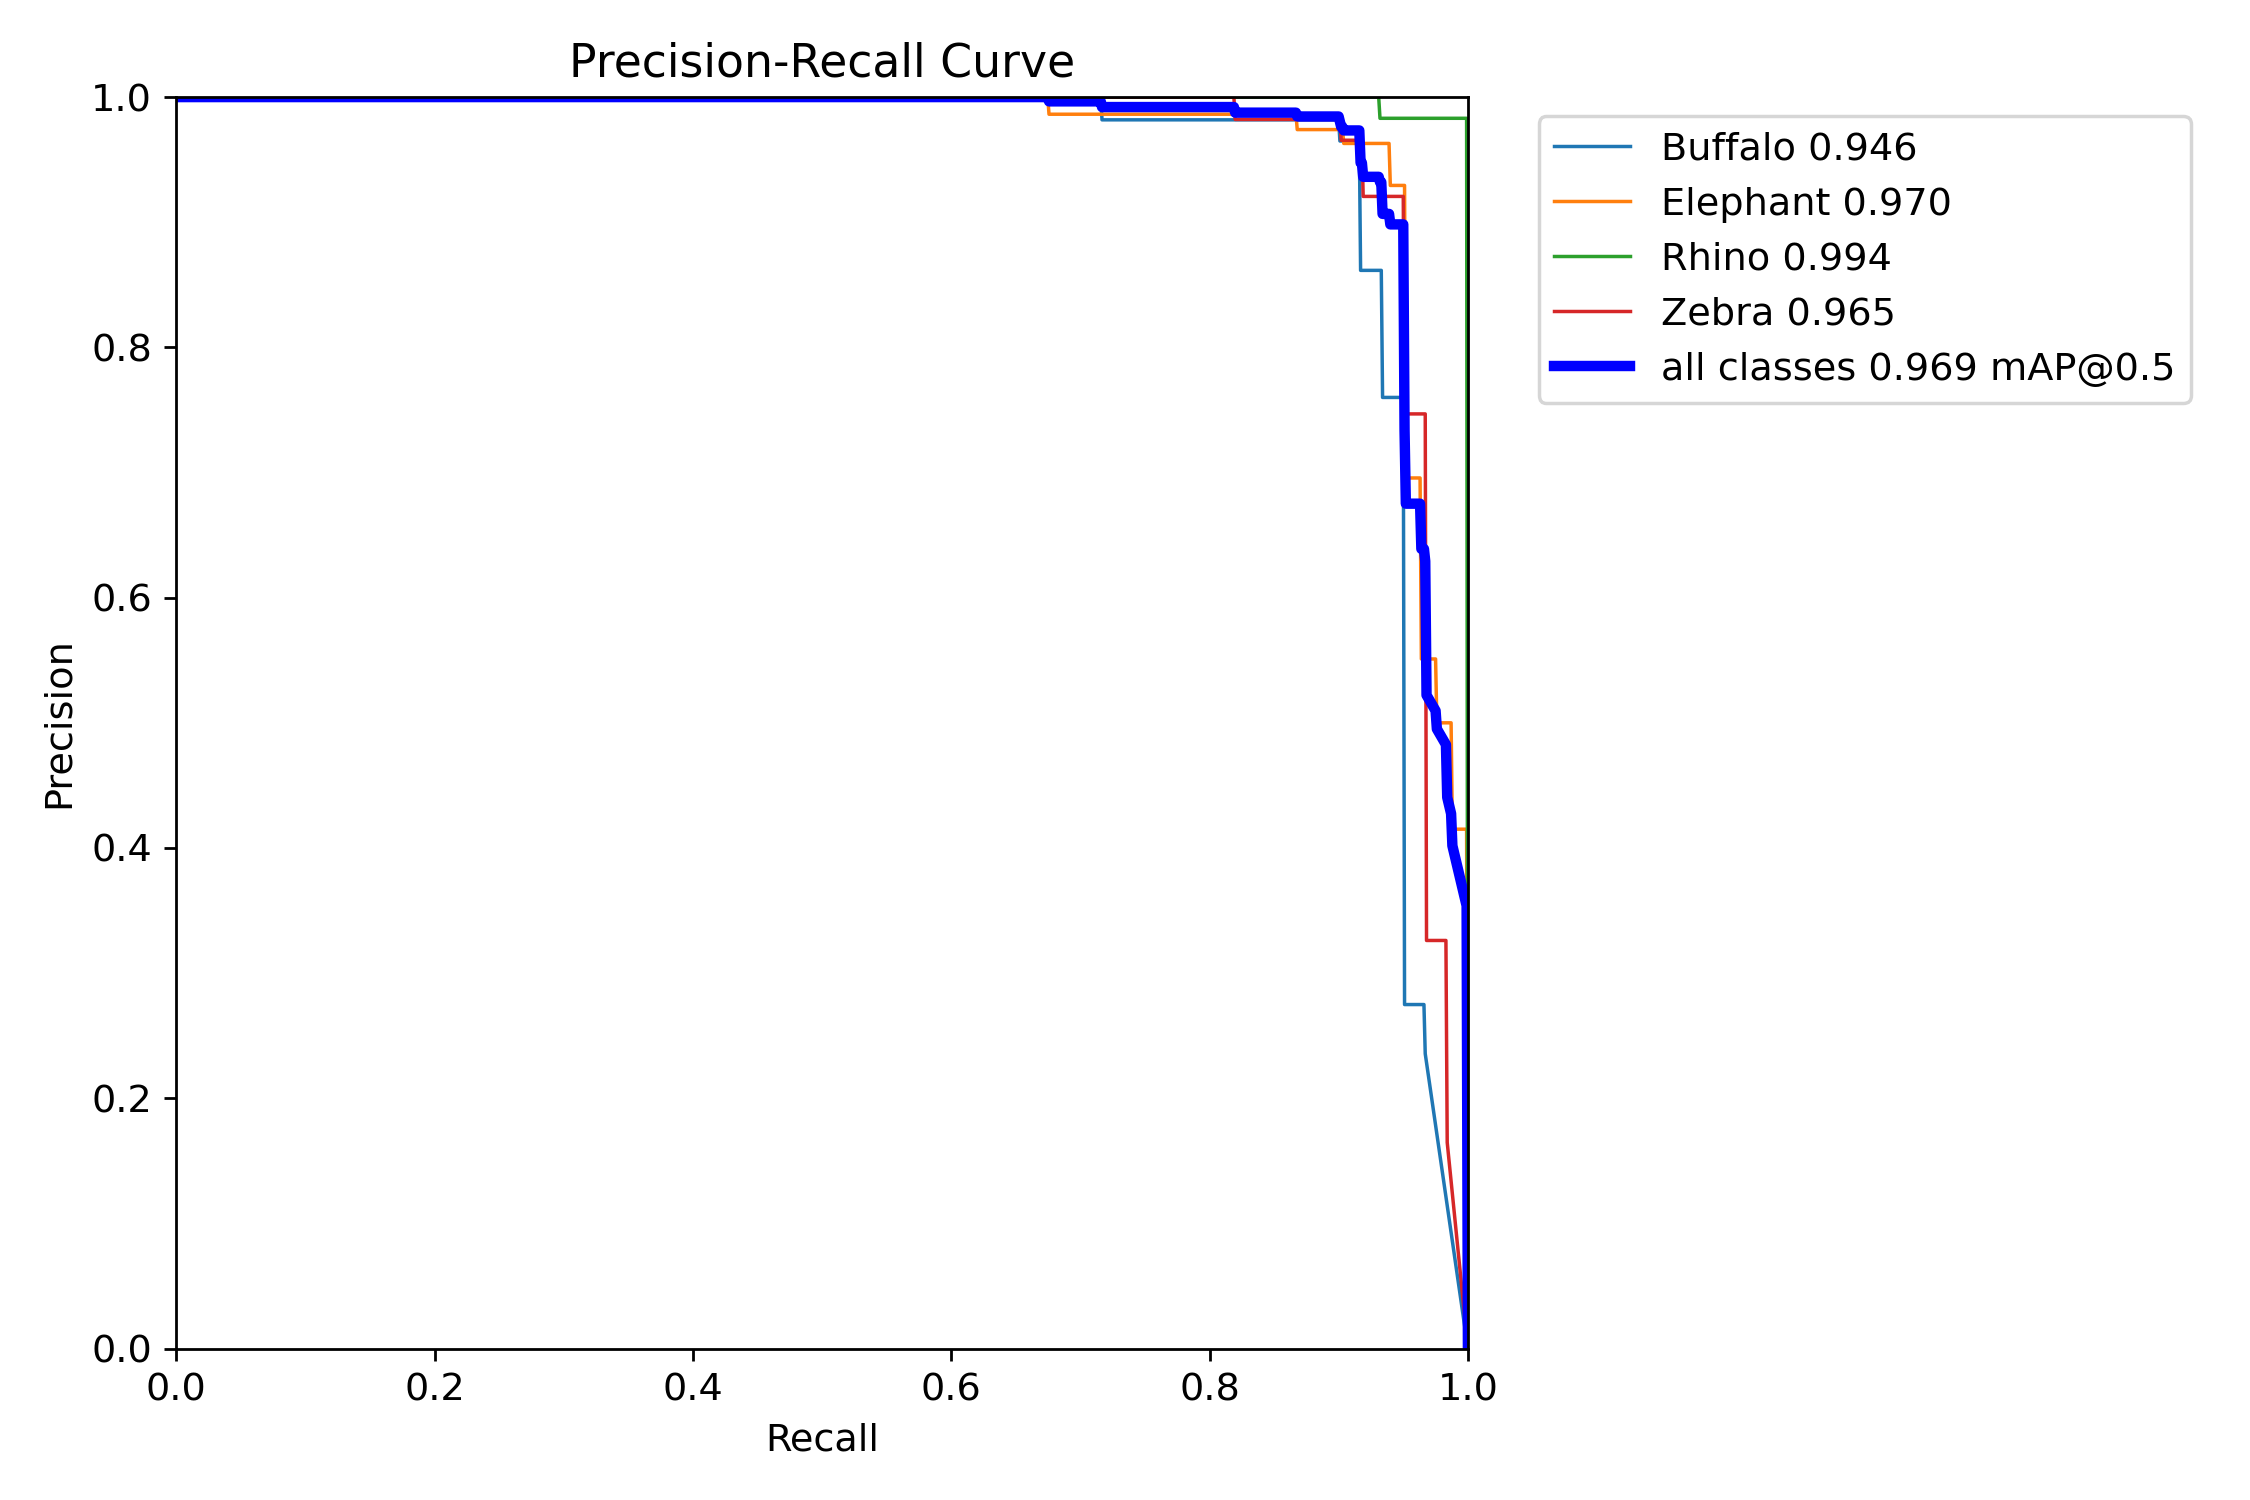

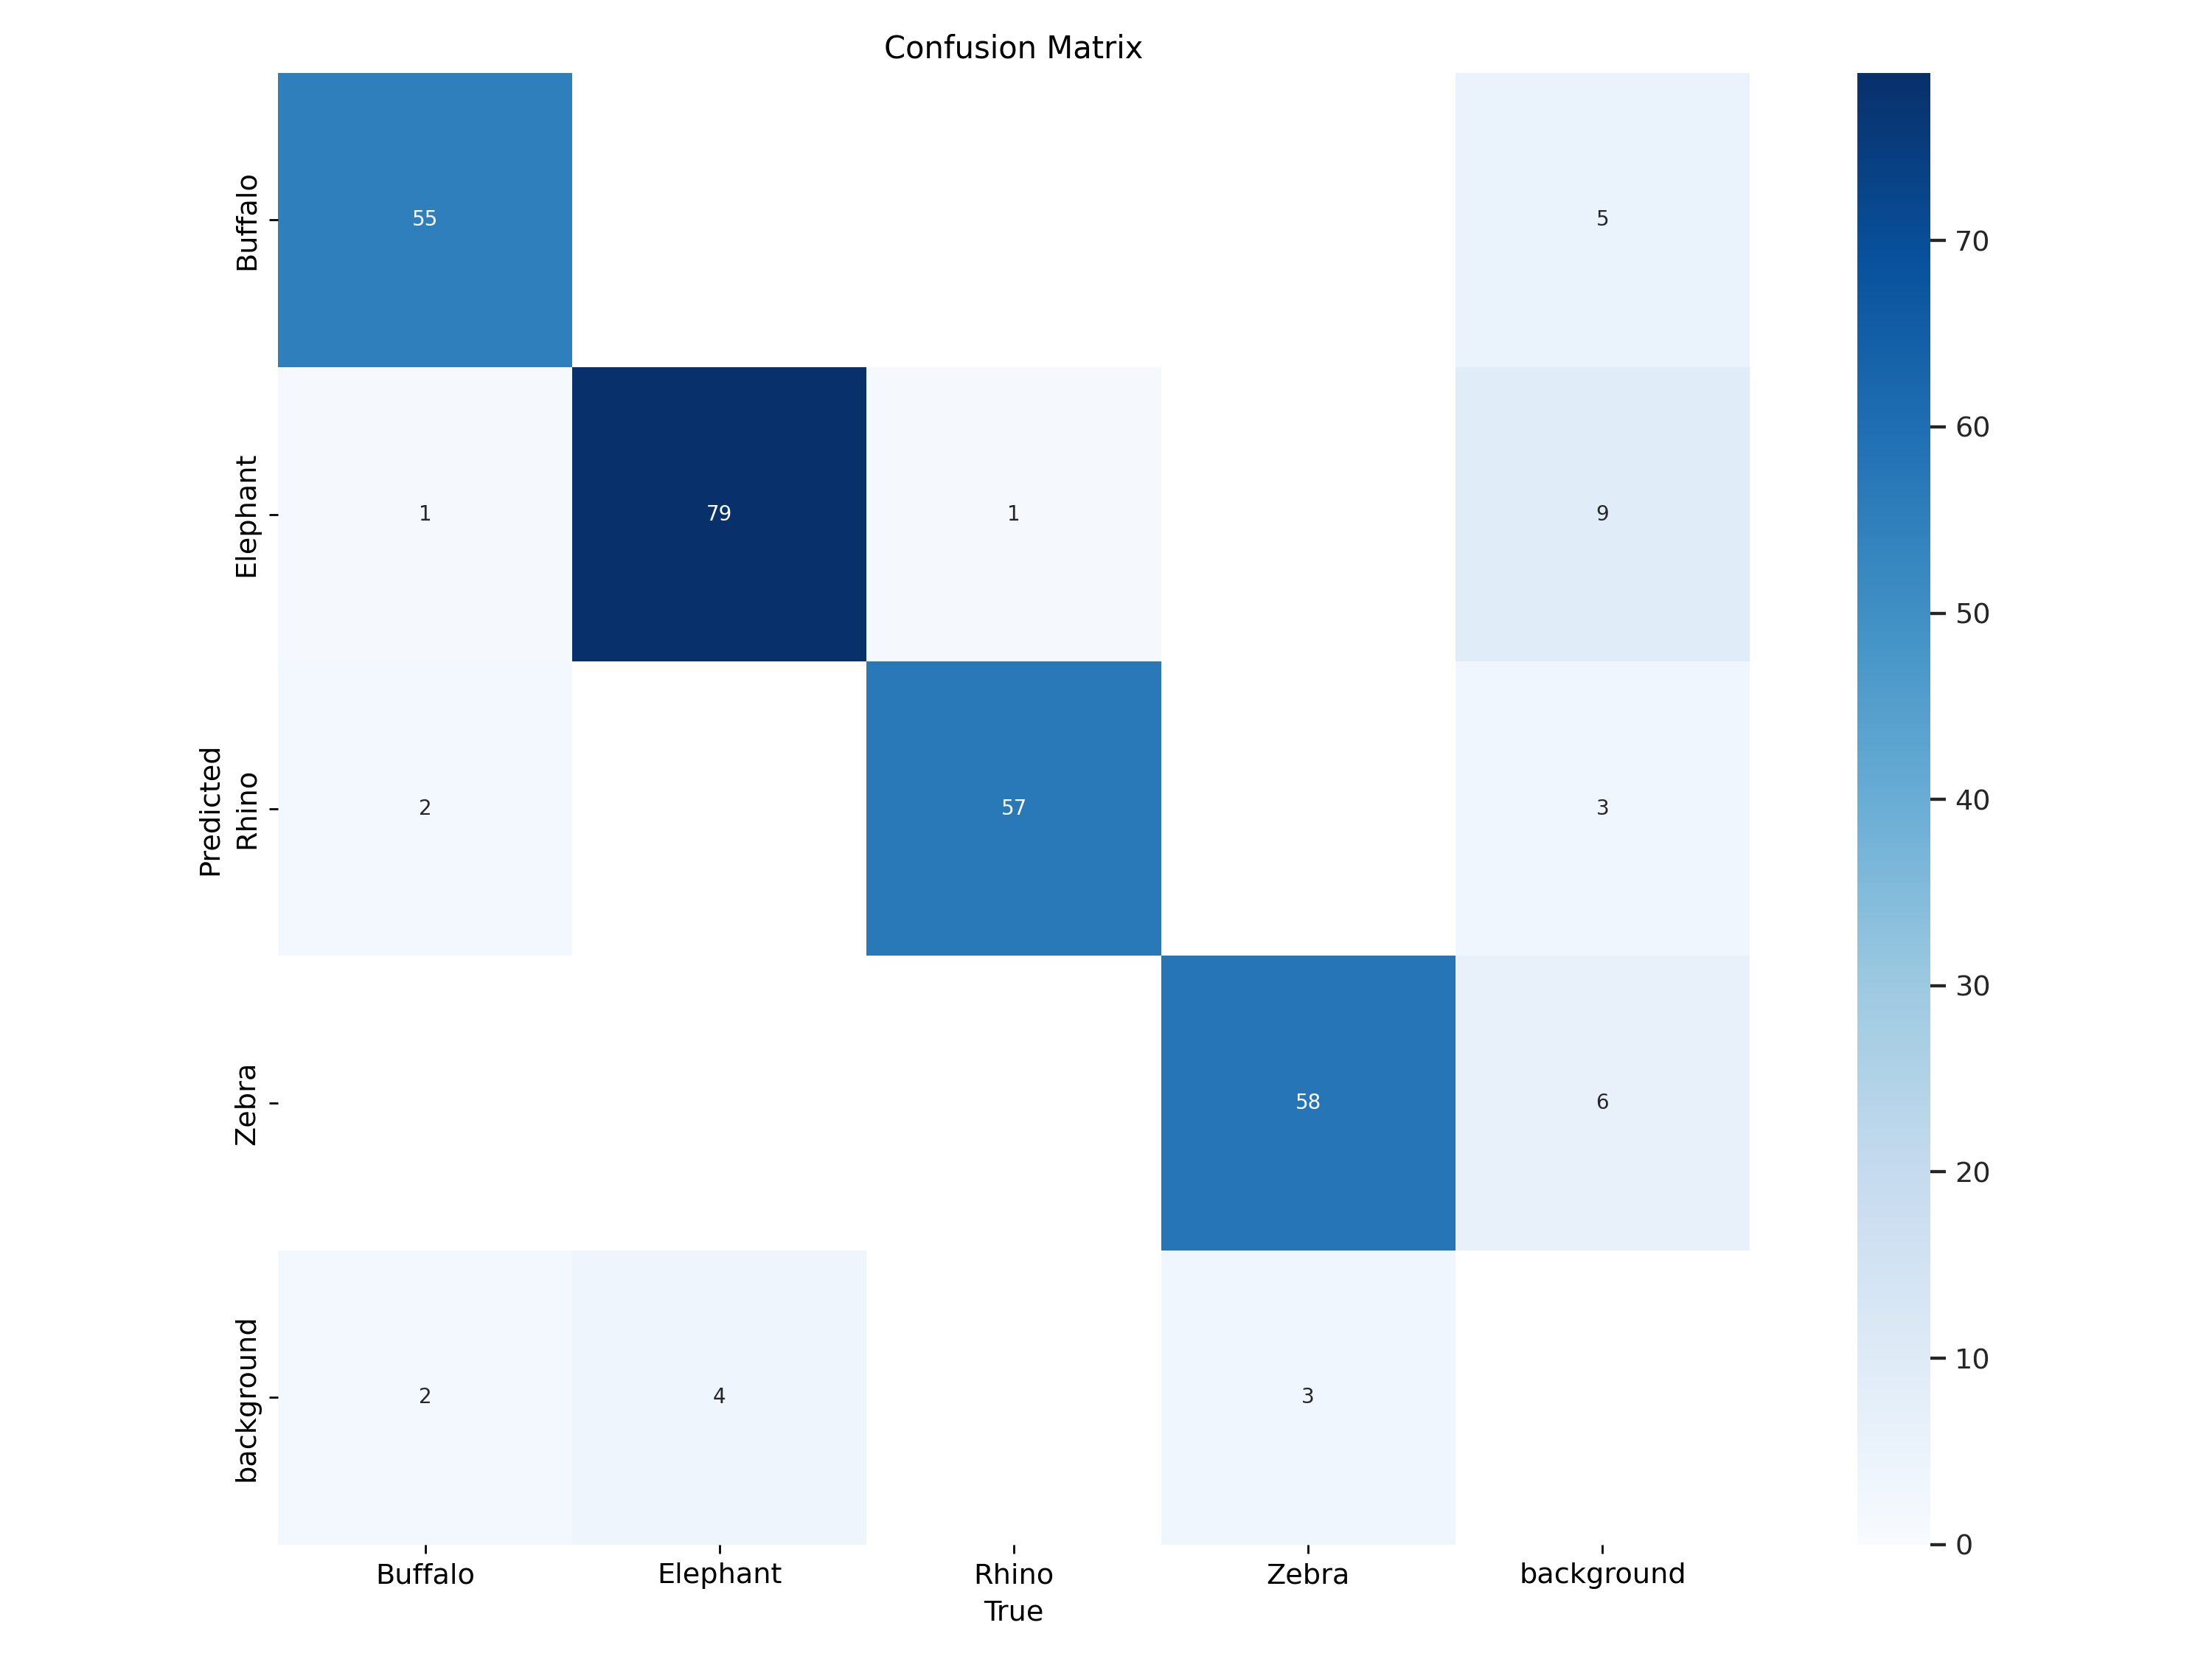

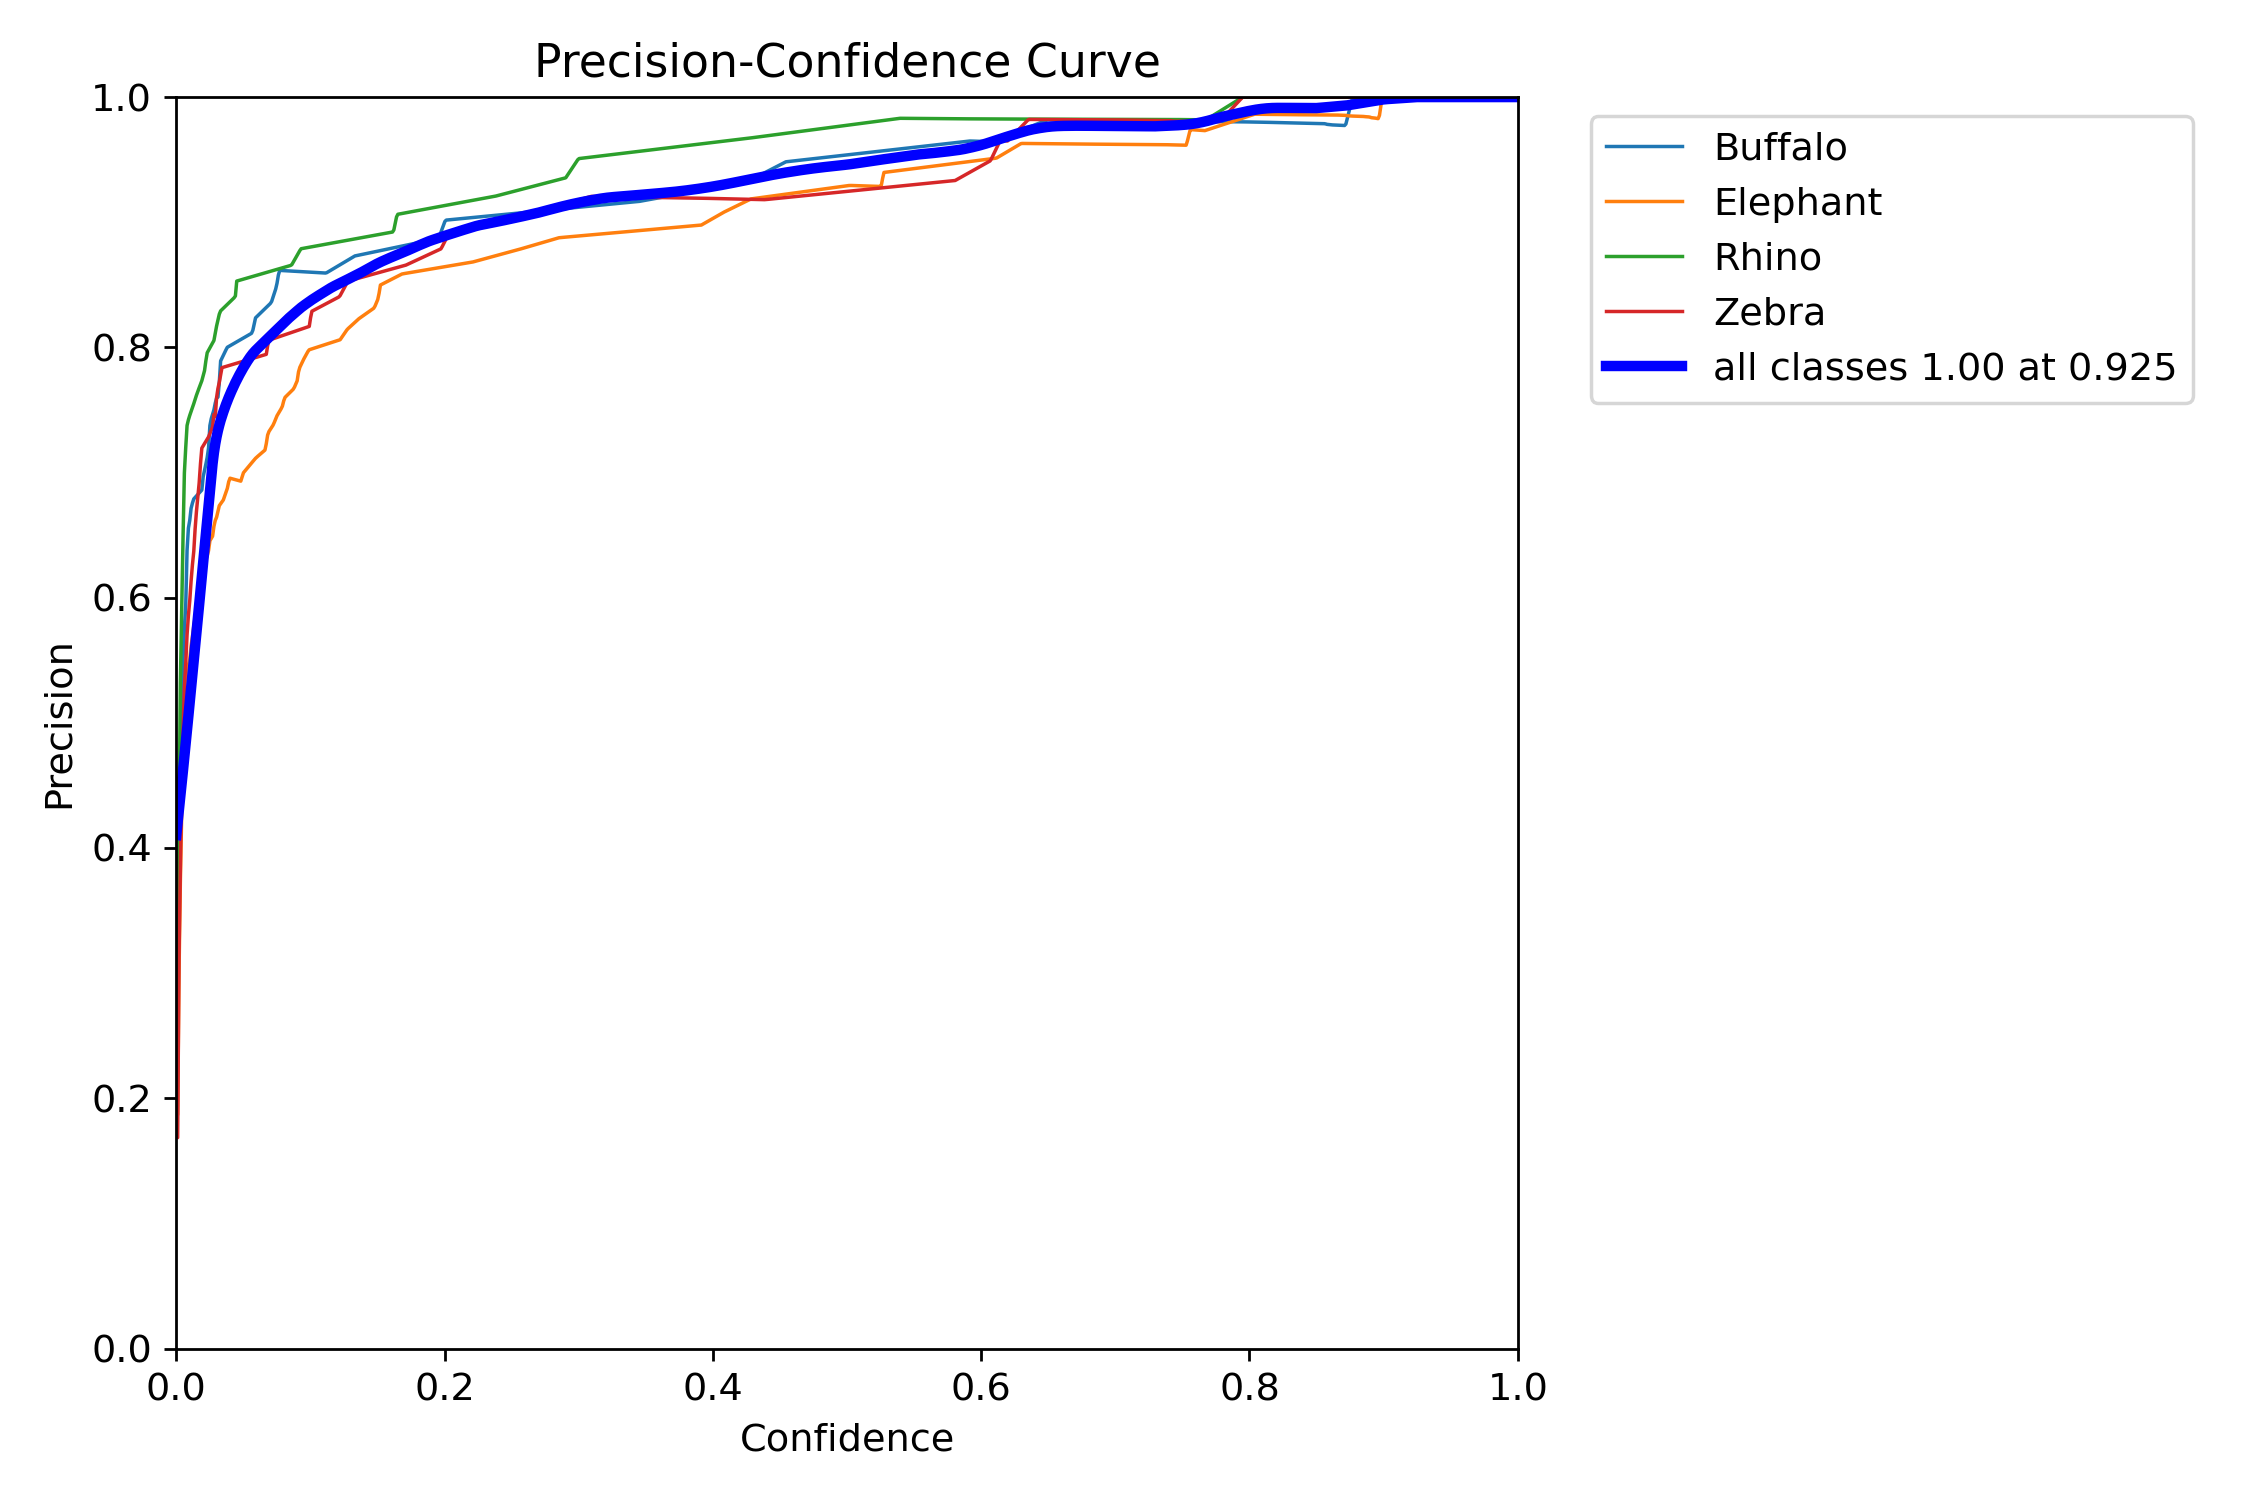

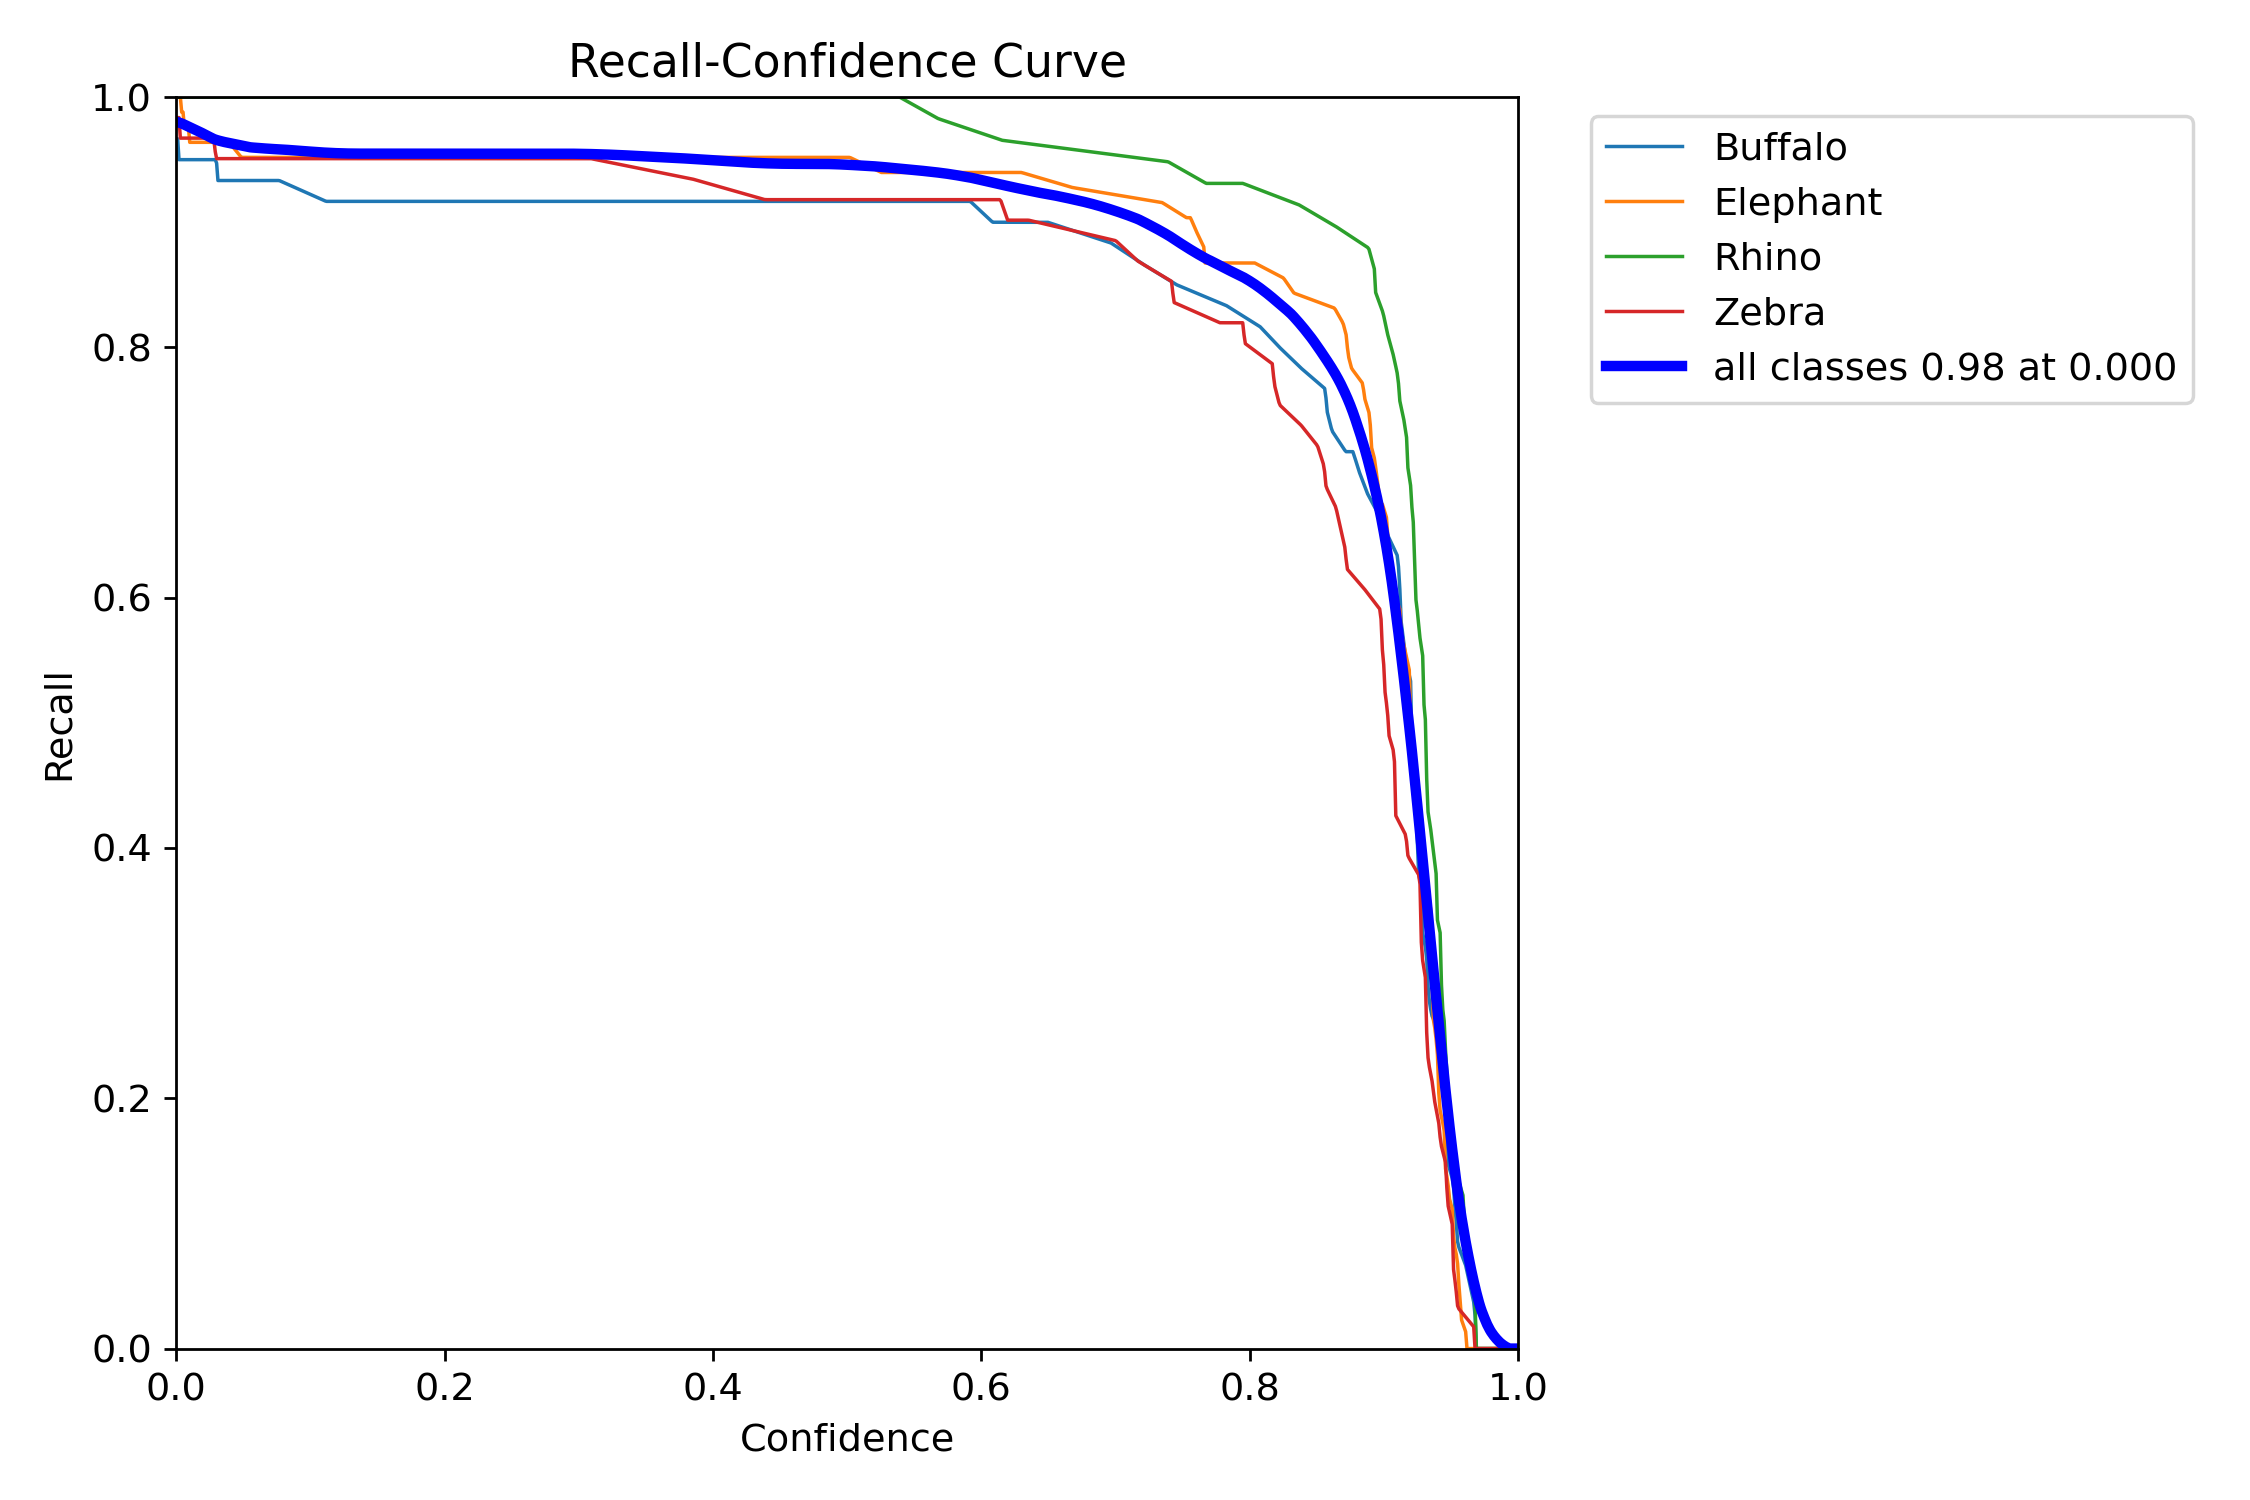

In [39]:
from IPython.display import display
from PIL import Image

# Display PR Curve
display(Image.open("runs/detect/train3/PR_curve.png"))

# Display Confusion Matrix
display(Image.open("runs/detect/train3/confusion_matrix.png"))

# Display mAP Curve
display(Image.open("runs/detect/train3/P_curve.png"))
display(Image.open("runs/detect/train3/R_curve.png"))



image 1/1 /content/tiger.jpg: 448x640 1 Zebra, 35.8ms
Speed: 3.3ms preprocess, 35.8ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict


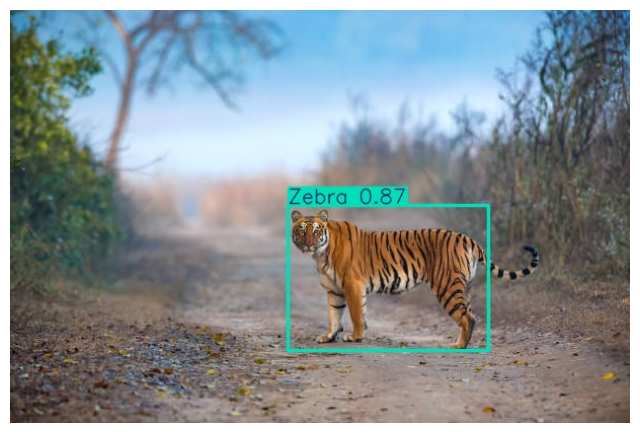

In [40]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os

# Load the trained model
model = YOLO("runs/detect/train3/weights/best.pt")  # Ensure correct path

# Path to test image (Replace with your actual test image)
image_path = "/content/tiger.jpg"

# Run inference
results = model(image_path, save=True, conf=0.5)  # conf=0.5 sets confidence threshold

# Find the saved image (YOLO saves it automatically)
output_folder = "runs/detect/predict/"
output_files = os.listdir(output_folder)
output_image_path = os.path.join(output_folder, output_files[0])  # Get first output image

# Display the detected image
if os.path.exists(output_image_path):
    img = cv2.imread(output_image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis("off")
    plt.show()
else:
    print(f"⚠️ Could not find the output image at {output_image_path}")



image 1/1 /content/elephant.jpg: 448x640 1 Elephant, 9.7ms
Speed: 4.2ms preprocess, 9.7ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict5


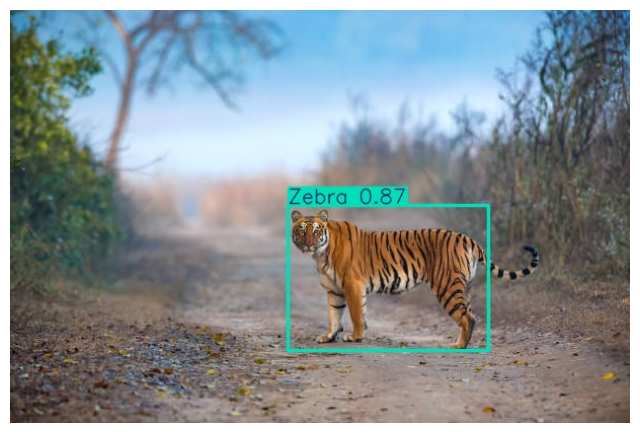

In [44]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os

# Load the trained model
model = YOLO("runs/detect/train3/weights/best.pt")  # Ensure correct path

# Path to test image (Replace with your actual test image)
image_path = "/content/elephant.jpg"

# Run inference
results = model(image_path, save=True, conf=0.5)  # conf=0.5 sets confidence threshold

# Find the saved image (YOLO saves it automatically)
output_folder = "runs/detect/predict/"
output_files = os.listdir(output_folder)
output_image_path = os.path.join(output_folder, output_files[0])  # Get first output image

# Display the detected image
if os.path.exists(output_image_path):
    img = cv2.imread(output_image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis("off")
    plt.show()
else:
    print(f"⚠️ Could not find the output image at {output_image_path}")


In [45]:
import os

output_folder = "runs/detect/predict/"

# Check if the directory exists
if os.path.exists(output_folder):
    print("📂 Files in output folder:", os.listdir(output_folder))
else:
    print("⚠️ No processed images found! Check if inference ran correctly.")


📂 Files in output folder: ['tiger.jpg']


In [48]:
# Delete previous predictions
!rm -rf runs/detect/predict/

# Run inference again
from ultralytics import YOLO

model = YOLO("runs/detect/train3/weights/best.pt")
image_path = "/content/wildlife_dataset/images/val/sample.jpg"

results = model(image_path, save=True, conf=0.5)  # Force new save

# Check the new output files
!ls runs/detect/predict/


FileNotFoundError: /content/wildlife_dataset/images/val/sample.jpg does not exist

In [57]:
import os

image_path = "/content/wildlife_dataset/images/val/sample.jpg"  # Replace with your actual image path

if os.path.exists(image_path):
    print("✅ Image exists:", image_path)
else:
    print("⚠️ Image NOT found! Checking available images...")
    print("Files in val/:", os.listdir("/content/wildlife_dataset/images/val"))


⚠️ Image NOT found! Checking available images...
Files in val/: ['1047.jpg', '0745.jpg', '0614.jpg', '0106.jpg', '0466.jpg', '1095.jpg', '0873.jpg', '1125.jpg', '0901.jpg', '0035.jpg', '0345.jpg', '0213.jpg', '0474.jpg', '1142.jpg', '0620.jpg', '0215.jpg', '1118.jpg', '0018.jpg', '0932.jpg', '0490.jpg', '0707.jpg', '1243.jpg', '0713.jpg', '0795.jpg', '1458.jpg', '0496.jpg', '0530.jpg', '0166.jpg', '0369.jpg', '1234.jpg', '0192.jpg', '0524.jpg', '0484.jpg', '0940.jpg', '1346.jpg', '0867.jpg', '0021.jpg', '0959.jpg', '0781.jpg', '0365.jpg', '1385.jpg', '0589.jpg', '0048.jpg', '0311.jpg', '0118.jpg', '0601.jpg', '0469.jpg', '1441.jpg', '0427.jpg', '1319.jpg', '0746.jpg', '0983.jpg', '0376.jpg', '0975.jpg', '0773.jpg', '0650.jpg', '0232.jpg', '0148.jpg', '1466.jpg', '0770.jpg', '0434.jpg', '0371.jpg', '0921.jpg', '0943.jpg', '0341.jpg', '0264.jpg', '0076.jpg', '0835.jpg', '1249.jpg', '0268.jpg', '0801.jpg', '0986.jpg', '0851.jpg', '0792.jpg', '0015.jpg', '1402.jpg', '0218.jpg', '0456.jpg',

In [58]:
import os
import glob

# Find an image in the validation set
val_images = glob.glob("/content/wildlife_dataset/images/val/*.jpg")

if val_images:
    image_path = val_images[0]  # Use the first available image
    print(f"✅ Using {image_path} for inference")
else:
    print("⚠️ No images found in validation set!")


✅ Using /content/wildlife_dataset/images/val/1047.jpg for inference



image 1/1 /content/wildlife_dataset/images/val/1047.jpg: 320x640 2 Rhinos, 9.0ms
Speed: 2.1ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs/detect/predict7


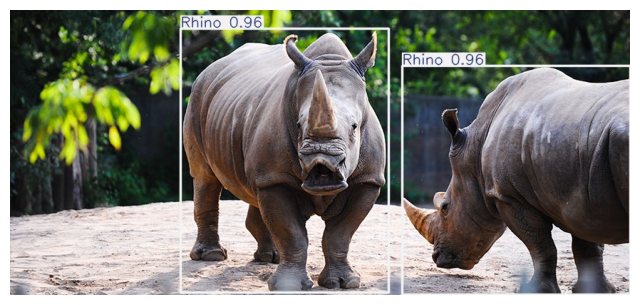

In [59]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the trained model
model = YOLO("runs/detect/train3/weights/best.pt")  # Update if needed

# Run inference
results = model(image_path, save=True, conf=0.5)  # Save processed image

# Find the processed output image
output_folder = "runs/detect/predict/"
output_files = os.listdir(output_folder)
output_image_path = os.path.join(output_folder, output_files[0])  # Get first saved image

# Display the detected image
if os.path.exists(output_image_path):
    img = cv2.imread(output_image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis("off")
    plt.show()
else:
    print(f"⚠️ Could not find the output image at {output_image_path}")


In [52]:
!ls runs/detect/predict/


1047.jpg


In [53]:
import os
import glob
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load trained model
model = YOLO("runs/detect/train3/weights/best.pt")  # Update if needed

# Get 5 test images from validation set
val_images = glob.glob("/content/wildlife_dataset/images/val/*.jpg")[:5]  # Pick the first 5 images

# Run inference on all selected images
for img_path in val_images:
    print(f"🖼 Running inference on: {img_path}")
    results = model(img_path, save=True, conf=0.5)  # Save processed image

# List all saved output images
output_folder = "runs/detect/predict/"
output_files = os.listdir(output_folder)
print("✅ Saved processed images:", output_files)


🖼 Running inference on: /content/wildlife_dataset/images/val/1047.jpg

image 1/1 /content/wildlife_dataset/images/val/1047.jpg: 320x640 2 Rhinos, 9.8ms
Speed: 2.0ms preprocess, 9.8ms inference, 1.4ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs/detect/predict6
🖼 Running inference on: /content/wildlife_dataset/images/val/0745.jpg

image 1/1 /content/wildlife_dataset/images/val/0745.jpg: 416x640 2 Elephants, 38.3ms
Speed: 2.5ms preprocess, 38.3ms inference, 3.7ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict6
🖼 Running inference on: /content/wildlife_dataset/images/val/0614.jpg

image 1/1 /content/wildlife_dataset/images/val/0614.jpg: 448x640 2 Elephants, 12.7ms
Speed: 4.2ms preprocess, 12.7ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict6
🖼 Running inference on: /content/wildlife_dataset/images/val/0106.jpg

image 1/1 /content/wildlife_dataset/images/val/0106.jpg: 448x

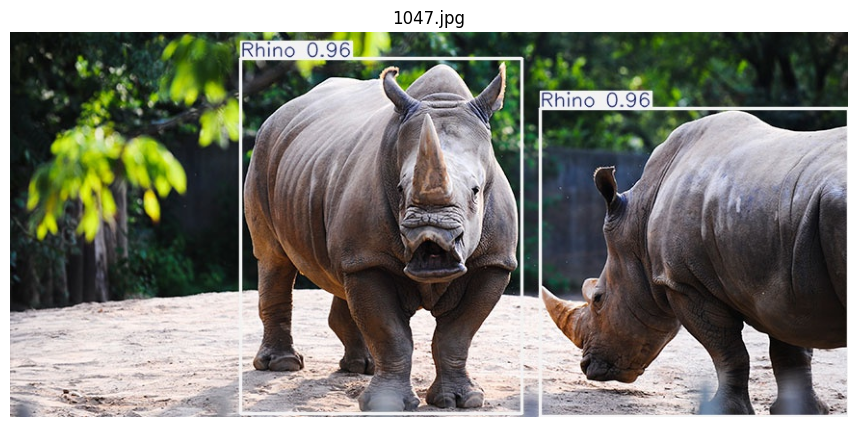

In [55]:
import cv2
import matplotlib.pyplot as plt
import glob
import os

# Get all processed images from the YOLO inference folder
output_images = glob.glob("runs/detect/predict/*.jpg")[:5]  # Get first 5 processed images

# Check if we have images to display
if len(output_images) == 0:
    print("⚠️ No processed images found in 'runs/detect/predict/'. Make sure inference ran correctly.")
else:
    # Set up the figure for multiple images
    fig, axes = plt.subplots(1, len(output_images), figsize=(15, 5))

    # If only one image, make sure `axes` is treated as a list
    if len(output_images) == 1:
        axes = [axes]

    # Loop through images and display them
    for ax, img_path in zip(axes, output_images):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        ax.imshow(img)
        ax.axis("off")
        ax.set_title(os.path.basename(img_path))

    plt.show()


In [60]:
import os
import glob
from ultralytics import YOLO

# Load trained model
model = YOLO("runs/detect/train3/weights/best.pt")  # Ensure correct path

# Get multiple test images
val_images = glob.glob("/content/wildlife_dataset/images/val/*.jpg")[:5]  # Select 5 images

# Run inference on all selected images
for img_path in val_images:
    print(f"🖼 Running inference on: {img_path}")
    results = model(img_path, save=True, conf=0.5)  # Save processed image

# Check saved output
print("✅ Checking saved predictions:")
!ls runs/detect/predict/


🖼 Running inference on: /content/wildlife_dataset/images/val/1047.jpg

image 1/1 /content/wildlife_dataset/images/val/1047.jpg: 320x640 2 Rhinos, 9.3ms
Speed: 2.6ms preprocess, 9.3ms inference, 1.3ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs/detect/predict8
🖼 Running inference on: /content/wildlife_dataset/images/val/0745.jpg

image 1/1 /content/wildlife_dataset/images/val/0745.jpg: 416x640 2 Elephants, 7.2ms
Speed: 2.7ms preprocess, 7.2ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict8
🖼 Running inference on: /content/wildlife_dataset/images/val/0614.jpg

image 1/1 /content/wildlife_dataset/images/val/0614.jpg: 448x640 2 Elephants, 13.5ms
Speed: 4.1ms preprocess, 13.5ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict8
🖼 Running inference on: /content/wildlife_dataset/images/val/0106.jpg

image 1/1 /content/wildlife_dataset/images/val/0106.jpg: 448x64

In [61]:
import os

# List all prediction directories
predict_folders = sorted([d for d in os.listdir("runs/detect/") if "predict" in d])
print("📂 Available prediction folders:", predict_folders)


📂 Available prediction folders: ['predict', 'predict2', 'predict3', 'predict4', 'predict5', 'predict6', 'predict7', 'predict8']


In [62]:
import shutil
import glob

# Define unified output directory
merged_output_folder = "runs/detect/multi_predict/"
os.makedirs(merged_output_folder, exist_ok=True)

# Find all predict folders (e.g., predict8, predict9)
predict_folders = sorted([d for d in os.listdir("runs/detect/") if "predict" in d])

# Move all processed images to `multi_predict/`
for folder in predict_folders:
    pred_files = glob.glob(f"runs/detect/{folder}/*.jpg")  # Get all images in predict folder

    for file in pred_files:
        filename = os.path.basename(file)
        new_filename = f"processed_{filename}"  # Prevent overwriting
        shutil.move(file, os.path.join(merged_output_folder, new_filename))
        print(f"✅ Moved: {file} → {merged_output_folder + new_filename}")

# Check the final saved predictions
print("✅ Final merged images in 'multi_predict/' folder:")
!ls runs/detect/multi_predict/


✅ Moved: runs/detect/predict/1047.jpg → runs/detect/multi_predict/processed_1047.jpg
✅ Moved: runs/detect/predict2/tiger1.jpg → runs/detect/multi_predict/processed_tiger1.jpg
✅ Moved: runs/detect/predict3/elephant.jpg → runs/detect/multi_predict/processed_elephant.jpg
✅ Moved: runs/detect/predict4/tiger.jpg → runs/detect/multi_predict/processed_tiger.jpg
✅ Moved: runs/detect/predict5/elephant.jpg → runs/detect/multi_predict/processed_elephant.jpg
✅ Moved: runs/detect/predict6/1047.jpg → runs/detect/multi_predict/processed_1047.jpg
✅ Moved: runs/detect/predict6/0745.jpg → runs/detect/multi_predict/processed_0745.jpg
✅ Moved: runs/detect/predict6/0614.jpg → runs/detect/multi_predict/processed_0614.jpg
✅ Moved: runs/detect/predict6/0106.jpg → runs/detect/multi_predict/processed_0106.jpg
✅ Moved: runs/detect/predict6/0466.jpg → runs/detect/multi_predict/processed_0466.jpg
✅ Moved: runs/detect/predict7/1047.jpg → runs/detect/multi_predict/processed_1047.jpg
✅ Moved: runs/detect/predict8/104

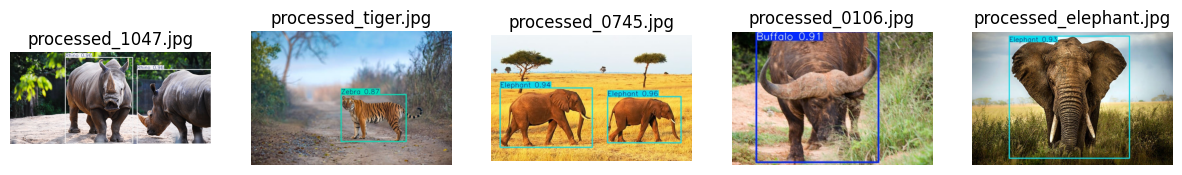

In [63]:
import cv2
import matplotlib.pyplot as plt
import glob

# Get all processed images
output_images = glob.glob("runs/detect/multi_predict/*.jpg")  # Fetch all saved detections

# Check if multiple images exist
if len(output_images) == 0:
    print("⚠️ No processed images found! Check if inference ran correctly.")
else:
    fig, axes = plt.subplots(1, min(len(output_images), 5), figsize=(15, 5))  # Limit to 5 images

    # If only one image, make `axes` iterable
    if len(output_images) == 1:
        axes = [axes]

    # Loop through images and display them
    for ax, img_path in zip(axes, output_images):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        ax.imshow(img)
        ax.axis("off")
        ax.set_title(os.path.basename(img_path))

    plt.show()


In [64]:
import shutil

# Define the folder with processed images
processed_folder = "runs/detect/multi_predict/"

# Define ZIP filename
shutil.make_archive("processed_results", "zip", processed_folder)

print("✅ Processed images compressed as 'processed_results.zip'")


✅ Processed images compressed as 'processed_results.zip'


In [65]:
from google.colab import files

# Download processed results
files.download("processed_results.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [66]:
import torch
import tensorflow as tf

# Load YOLO model
model_path = "runs/detect/train3/weights/best.pt"
model = torch.load(model_path, map_location=torch.device("cpu"))  # Load on CPU

# Convert to TensorFlow model
model.eval()  # Set model to evaluation mode
dummy_input = torch.randn(1, 3, 640, 640)  # Example input tensor
torch.onnx.export(model, dummy_input, "yolo_model.onnx", opset_version=11)  # Export to ONNX

# Convert ONNX to TensorFlow
import onnx
from onnx_tf.backend import prepare

onnx_model = onnx.load("yolo_model.onnx")  # Load ONNX model
tf_model = prepare(onnx_model)  # Convert to TensorFlow

# Save as .h5 file
h5_model_path = "yolo_model.h5"
tf_model.export_graph(h5_model_path)

print(f"✅ YOLO model converted and saved as {h5_model_path}")


AttributeError: 'dict' object has no attribute 'eval'

In [67]:
from ultralytics import YOLO

# Load the YOLOv8 trained model
model_path = "runs/detect/train3/weights/best.pt"
model = YOLO(model_path)  # Load the YOLO model properly

# Check model architecture
model.info()


Model summary: 129 layers, 3,011,628 parameters, 0 gradients, 8.2 GFLOPs


(129, 3011628, 0, 8.197376)

In [68]:
# Export the model to ONNX format
model.export(format="onnx", dynamic=True)


Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs/detect/train3/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 8, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 182.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.9/142.9 kB 238.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.8/280.8 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 226.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 260.1 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 17.7s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu']
requirements: ⚠️ Restart runtime or rerun command for updates

'runs/detect/train3/weights/best.onnx'